In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Análisis Exploratorio de Datos (EDA)
i. Tipo de dato
Primero, verificamos los tipos de datos y su clasificación en el DataFrame:

In [5]:
data = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')

In [6]:
data.info()  #complementar con informacion ya explorada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2311 non-null   int64  
 1   Trimester           2311 non-null   int64  
 2   District            2311 non-null   object 
 3   Neighbourhood       2311 non-null   object 
 4   Price (euro/month)  2311 non-null   float64
 5   Price (euro/m2)     2311 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 108.5+ KB


ii. Estadística descriptiva
Calculamos las estadísticas descriptivas para resumir la tendencia central, dispersión y forma de la distribución de los datos:

In [7]:
data.describe()  #complementar con informacion ya explorada

,Year,Trimester,Price (euro/month),Price (euro/m2)
count,2311.000000,2311.000000,2311.000000,2311.000000
mean,2017.745565,2.440502,820.780658,12.134531
std,2.463095,1.116498,255.450568,2.419414
min,2014.000000,1.000000,142.340000,3.180000
25%,2016.000000,1.000000,653.860000,10.500000
50%,2018.000000,2.000000,777.210000,12.100000
75%,2020.000000,3.000000,926.500000,13.750000
max,2022.000000,4.000000,2034.000000,21.300000


iii. Función de distribución
Visualizamos la distribución de la variable objetivo "Price (euro/m2)" utilizando un histograma:

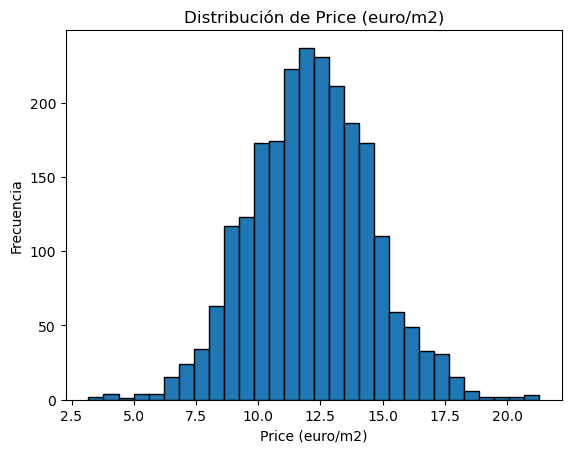

In [8]:
plt.hist(data['Price (euro/m2)'], bins=30, edgecolor='k')
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
# Prueba de Shapiro-Wilk para 'Price (euro/m2)'
stat, p = stats.shapiro(data['Price (euro/m2)'])
print('Prueba de Shapiro-Wilk')
print('Estadístico=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Distribución probablemente normal')
else:
    print('Distribución probablemente no normal')

# Prueba de Kolmogorov-Smirnov para 'Price (euro/m2)'
d, p_value = stats.kstest(data['Price (euro/m2)'], 'norm', args=(data['Price (euro/m2)'].mean(), data['Price (euro/m2)'].std()))
print('Prueba de Kolmogorov-Smirnov')
print('Estadístico=%.3f, p=%.3f' % (d, p_value))
if p_value > 0.05:
    print('Distribución probablemente normal')
else:
    print('Distribución probablemente no normal')

Prueba de Shapiro-Wilk
Estadístico=0.998, p=0.002
Distribución probablemente no normal
Prueba de Kolmogorov-Smirnov
Estadístico=0.020, p=0.323
Distribución probablemente normal


iv. Interpretar la variable objetivo en base a la función de distribución
Creamos un boxplot para identificar visualmente la presencia de outliers en "Price (euro/m2)":

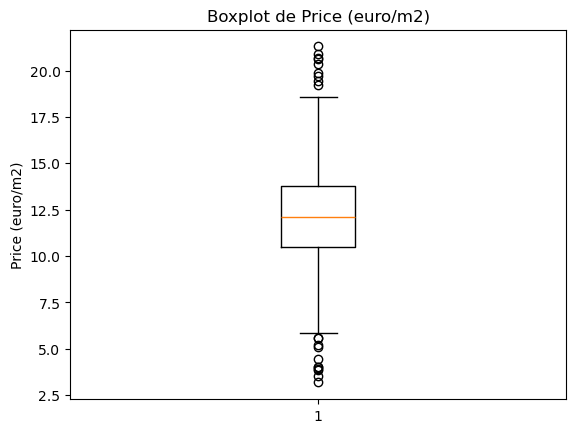

In [10]:
plt.boxplot(data['Price (euro/m2)'])
plt.title('Boxplot de Price (euro/m2)')
plt.ylabel('Price (euro/m2)')
plt.show()

Corrección o imputación de outliers
Reemplazamos los outliers con kmeans

In [11]:
# Selección de columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [12]:
# Escalar los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

calculo de tamaño de clusters

In [13]:
# Calcular SSE para diferentes valores de k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_  # SSE para el número de clústeres k

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

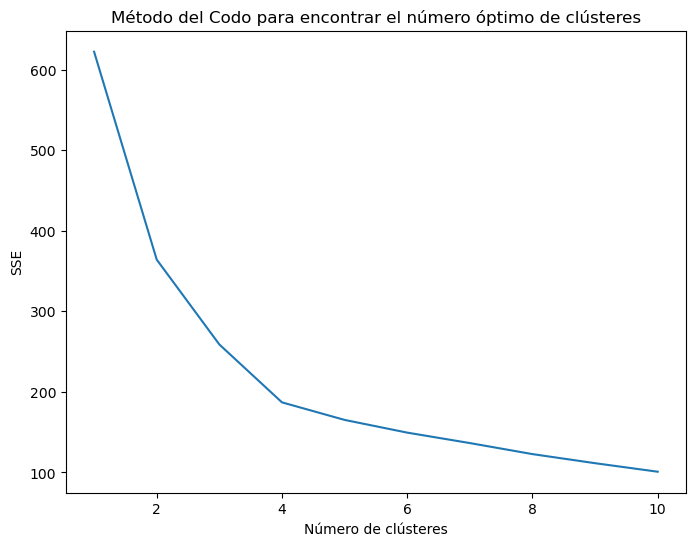

In [14]:

# Graficar SSE vs. k
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.title("Método del Codo para encontrar el número óptimo de clústeres")
plt.show()

In [15]:
# teniendo en cuenta el grafico del codo , encontramos que el tamaño de cluster mas adecuado es 4
# Aplicar K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Añadir los clusters al dataframe original
data['Cluster'] = clusters

In [17]:

# Calcular la distancia de cada punto al centroide del clúster
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

In [18]:
# Definir umbral para considerar un punto como outlier
threshold = data['Distance_to_Centroid'].quantile(0.95)

In [19]:
# Identificar outliers
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold
# Contar el número de outliers identificados
num_outliers = data['Is_Outlier'].sum()
# Contar el número total de registros en el dataset original
total_records = len(data)
# Calcular el porcentaje de outliers
percentage_outliers = (num_outliers / total_records) * 100
# Mostrar los resultados
print(f'Número de outliers: {num_outliers}')
print(f'Número total de registros: {total_records}')
print(f'Porcentaje de outliers: {percentage_outliers:.2f}%')

Número de outliers: 116
Número total de registros: 2311
Porcentaje de outliers: 5.02%


In [20]:
# Visualización de outliers
outliers = data[data['Is_Outlier']]


In [21]:
outliers_info = outliers[['Year', 'Trimester', 'District', 'Neighbourhood', 'Price (euro/m2)', 'Cluster', 'Distance_to_Centroid']]
print(outliers_info.head())

     Year  Trimester             District    Neighbourhood  Price (euro/m2)  \
44   2014          1           Nou Barris      Can Peguera             6.03   
87   2014          2            Les Corts        Pedralbes            12.52   
90   2014          2  Sarria-Sant Gervasi  les Tres Torres            14.40   
122  2014          2          Sant Andreu    Baro de Viver             4.03   
157  2014          3            Les Corts        Pedralbes            12.06   

     Cluster  Distance_to_Centroid  
44         2              0.447767  
87         2              0.492854  
90         2              0.472023  
122        2              0.522009  
157        1              0.481651  


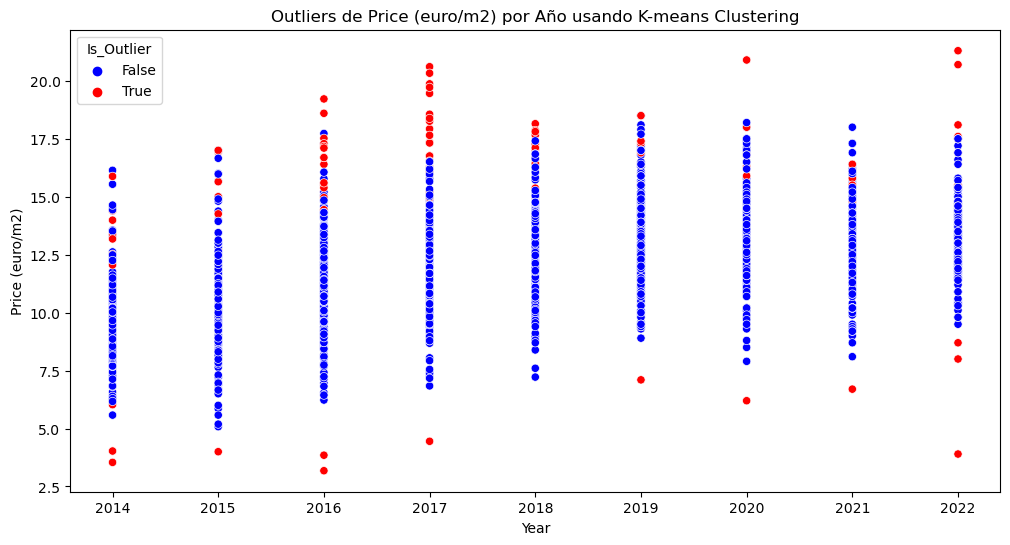

In [22]:
# Visualizar los outliers por año
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Price (euro/m2)', hue='Is_Outlier', palette={True: 'red', False: 'blue'})
plt.title('Outliers de Price (euro/m2) por Año usando K-means Clustering')
plt.show()

In [23]:
# Eliminar outliers antes de continuar con el modelado
data_clean = data[~data['Is_Outlier']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


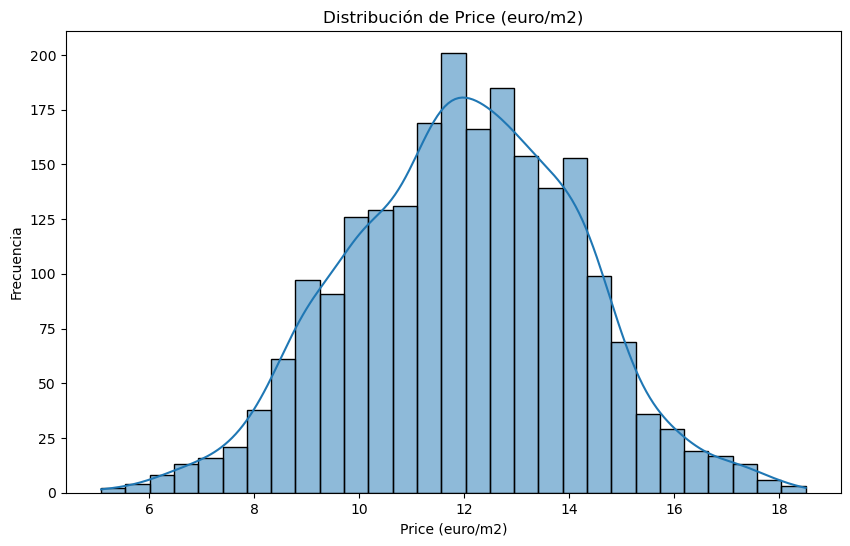

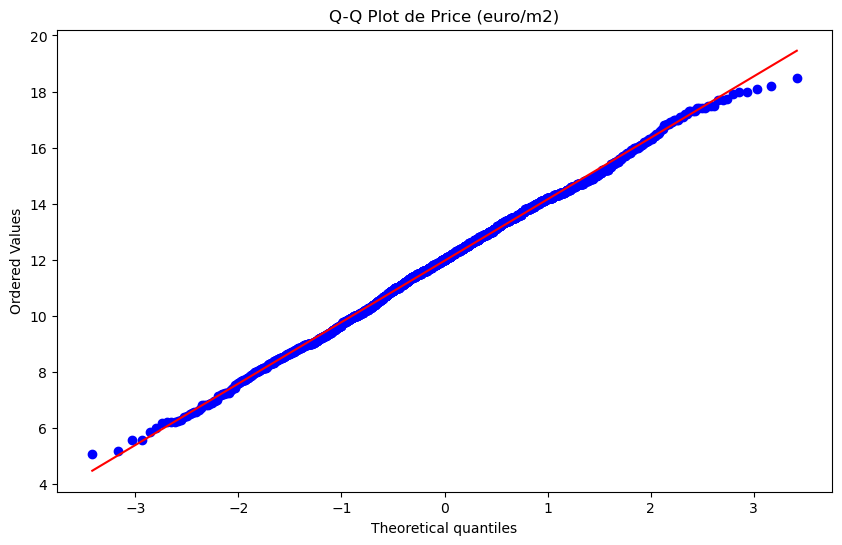

Prueba de Shapiro-Wilk
Estadístico=0.998, p=0.016
Distribución probablemente no normal
Prueba de Kolmogorov-Smirnov
Estadístico=0.019, p=0.374
Distribución probablemente normal


In [24]:


# Histograma y KDE Plot para 'Price (euro/m2)'
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Price (euro/m2)'], kde=True)
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

# Q-Q Plot para 'Price (euro/m2)'
plt.figure(figsize=(10, 6))
stats.probplot(data_clean['Price (euro/m2)'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Price (euro/m2)')
plt.show()

# Prueba de Shapiro-Wilk para 'Price (euro/m2)'
stat, p = stats.shapiro(data_clean['Price (euro/m2)'])
print('Prueba de Shapiro-Wilk')
print('Estadístico=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Distribución probablemente normal')
else:
    print('Distribución probablemente no normal')

# Prueba de Kolmogorov-Smirnov para 'Price (euro/m2)'
d, p_value = stats.kstest(data_clean['Price (euro/m2)'], 'norm', args=(data_clean['Price (euro/m2)'].mean(), data_clean['Price (euro/m2)'].std()))
print('Prueba de Kolmogorov-Smirnov')
print('Estadístico=%.3f, p=%.3f' % (d, p_value))
if p_value > 0.05:
    print('Distribución probablemente normal')
else:
    print('Distribución probablemente no normal')


EVALUANDO EL MODELO CON ELIMINACION DE OUTLIERS CON KMEANS, SE CONFIRMA QUE LA DISTRIBUCION DE LOS DATOS ES NORMAL.

In [25]:
# Binarización de variables categóricas
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

In [26]:
# División Train Test
X = data_encoded.drop('Price (euro/m2)', axis=1)
y = data_encoded['Price (euro/m2)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Transformación (Escalado), previo al procesamiento debemos escalar los datos para llevarlos a una escala comun
# Mejora del Rendimiento del Modelo,Convergencia Más Rápida,Equidad de las Características.
#Metodos comunes de escalado: Min-max scaling(normalizacion) , standard scaling(estandarizacion), robust scaling
# en nuestro caso seleccionaremos  MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import Ridge

# Definir el modelo de regresión Ridge
ridge_model = Ridge()
# Entrenar y evaluar el modelo Ridge
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [29]:
# Entrenar y evaluar el modelo Ridge
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MAE (Ridge): {mae_ridge}, MSE (Ridge): {mse_ridge}, RMSE (Ridge): {rmse_ridge}, R² (Ridge): {r2_ridge}')

MAE (Ridge): 0.4916088822009097, MSE (Ridge): 0.4607188546634674, RMSE (Ridge): 0.6787627381224366, R² (Ridge): 0.9117413927163492


El ajuste del modelo mejora considerablemente, pasamos de un 0.84 al 0.91 utilizando kmeans para gestion de outliers

In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
# Validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=kf, scoring='r2', n_jobs=-1)

print(f'Validación cruzada R²: {scores.mean()}, {scores.std()}')

Validación cruzada R²: 0.9067083608920731, 0.015200429004266078


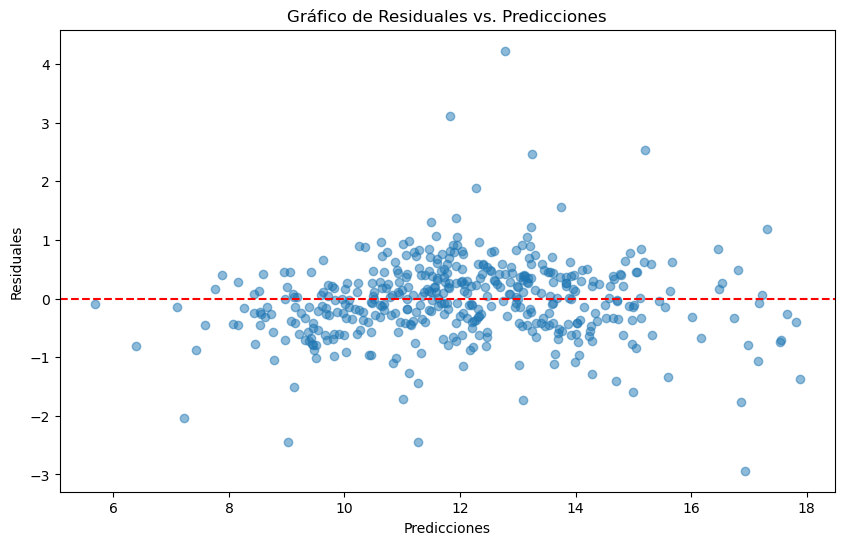

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


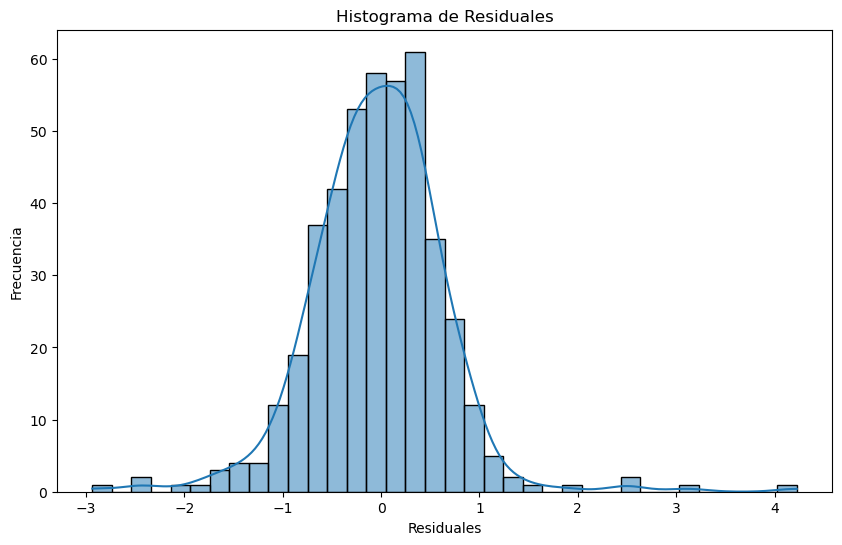

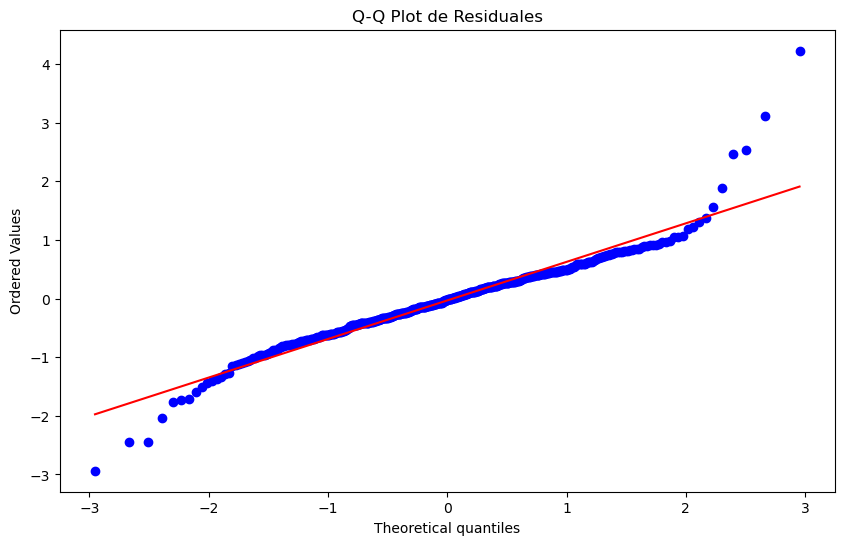

In [31]:
# Calcular residuales
residuals = y_test - y_pred_ridge
# Gráfico de Residuales vs. Predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuales vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()

# Histograma de Residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

# Q-Q Plot de Residuales
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales')
plt.show()
#Este código te ayudará a verificar si hay patrones no deseados en los errores de predicción y te dará una mejor idea de cómo está funcionando tu modelo.




### Análisis de Residuales

1. **Gráfico de Residuales vs. Predicciones:**
   - Los residuales están distribuidos aleatoriamente alrededor del eje horizontal (en 0), indicando que no hay patrones claros en los errores y que el modelo está capturando bien la variabilidad de los datos.

2. **Histograma de Residuales:**
   - El histograma muestra una distribución aproximadamente normal de los residuales, lo que sugiere que los errores del modelo están distribuidos normalmente.

3. **Q-Q Plot de Residuales:**
   - El Q-Q Plot indica que la mayoría de los puntos siguen la línea roja, sugiriendo que los residuales están normalmente distribuidos. Aunque hay algunos valores en los extremos que se desvían, esto es común en conjuntos de datos reales.

### Conclusión
Los análisis de los residuales sugieren que el modelo de regresión Ridge está capturando bien la estructura de los datos y que las suposiciones de normalidad de los errores se mantienen razonablemente bien. Esto refuerza la validez del modelo para hacer inferencias y predicciones basadas en los datos disponibles.


In [44]:
#prediccion con nuevos datos
# Preprocesamiento de los nuevos datos
# Cargar los nuevos datos
new_data = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción
predictions = ridge_model.predict(new_data_scaled)
new_data['Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Price (euro/m2)']])

   Year  Trimester      District        Neighbourhood  Price (euro/m2)
0  2024          1      Eixample  Dreta de l'Eixample        -2.566183
1  2024          2    Sant Martí          El Poblenou        -2.404863
2  2024          3        Gràcia       Vila de Gràcia        -2.379756
3  2024          4  Ciutat Vella             El Raval        -1.630983


Con el modelo ridge el modelo es valido, pero me gustaría hacer una ultima prueba
con transformacion logaritmica o transformacion box cox

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import scipy.stats as stats

# Configuración de visualización
sns.set(style="whitegrid")

# Cargar los datos de entrenamiento
data = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos de entrenamiento
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

data_clean = data[~data['Is_Outlier']]
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

X = data_encoded.drop('Price (euro/m2)', axis=1)
y = data_encoded['Price (euro/m2)']

# Aplicar transformación de Box-Cox a la variable objetivo
pt = PowerTransformer(method='box-cox')
y_transformed = pt.fit_transform(y.values.reshape(-1, 1)).flatten()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar modelos
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_transformed = model.predict(X_test_scaled)
    y_pred = pt.inverse_transform(y_pred_transformed.reshape(-1, 1)).flatten()
    y_test_exp = pt.inverse_transform(y_test.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_test_exp, y_pred)
    mse = mean_squared_error(y_test_exp, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_exp, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print(f'\nModel: {name}')
    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')
    print(f'Cross-Validation R²: {cv_scores.mean()}, {cv_scores.std()}')

# Crear un dataframe con los años 2023 a 2026, todos los trimestres, distritos y barrios
years = [2023, 2024, 2025, 2026]
trimesters = [1, 2, 3, 4]
districts = data['District'].unique()
neighbourhoods = data['Neighbourhood'].unique()
new_data = pd.DataFrame([(year, trimester, district, neighbourhood)
                         for year in years
                         for trimester in trimesters
                         for district in districts
                         for neighbourhood in neighbourhoods],
                        columns=['Year', 'Trimester', 'District', 'Neighbourhood'])

# Preprocesamiento y predicción de los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[X.columns]

new_data_scaled = scaler.transform(new_data_encoded)
predictions_transformed = models['RandomForest'].predict(new_data_scaled)
predictions = pt.inverse_transform(predictions_transformed.reshape(-1, 1)).flatten()
new_data['Price (euro/m2)'] = predictions

# Guardar el nuevo dataframe con predicciones
new_data.to_csv('./predicted_prices_2023_to_2026.csv', index=False)

# Cargar el dataset original y el de predicciones
data_original = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')
data_predictions = pd.read_csv('./predicted_prices_2023_to_2026.csv')

# Unir los datasets
combined_data = pd.merge(data_original, data_predictions, on=['District', 'Neighbourhood', 'Year', 'Trimester'], how='outer')
combined_data.to_csv('./prueba_2023_2026.csv', index=False)

# Visualización final
data = pd.read_csv('./prueba_2023_2026.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price (euro/m2)', data=data)
plt.title('Distribución de Precio por Año')
plt.xlabel('Año')
plt.ylabel('Precio (euro/m2)')
plt.xticks(rotation=45)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Model: Ridge
MAE: 0.4863546609415616, MSE: 0.45247174315563066, RMSE: 0.6726601988787732, R²: 0.9133212685309093
Cross-Validation R²: 0.90351933190192, 0.012487583899703843

Model: Lasso
MAE: 1.8306683393229557, MSE: 5.223743848895104, RMSE: 2.285551103978011, R²: -0.0006978274131781426
Cross-Validation R²: -0.0015905273424927646, 0.0016290731300665426

Model: ElasticNet
MAE: 1.8306683393229557, MSE: 5.223743848895104, RMSE: 2.285551103978011, R²: -0.0006978274131781426
Cross-Validation R²: -0.0015905273424927646, 0.0016290731300665426

Model: RandomForest
MAE: 0.4252081273066158, MSE: 0.410213996763636, RMSE: 0.6404795053423927, R²: 0.921416465429737
Cross-Validation R²: 0.9115880493027267, 0.014546543240224452


ValueError: Could not interpret input 'Price (euro/m2)'

<Figure size 1000x600 with 0 Axes>

como conclusiones, 
1. nuestra distribucion de datos se aproxima a una distribucion normal, sin teneer certeza total
2. las pruebas de normalidad para los dos elecciones de gestion de outliers, reemplazo por mediana y la segunda, eliminacion por kmeans , encontramos que los kmeans se asemejanmas a una distribucion normal
3. eleccion de modelo de entrenamiento , al tener datos posiblemente no normales , se evaluaron diferentes modelos con mejores resultados para random forest , el otro evaluado fue regresion ridge 
3. evaluando de las dos modelos  con transformacion box cox , o simplemente con el resultado de kmeans , obtenemos predicciones similares para simplificar , eligiremos, no transformar datos.

In [47]:

#EXPERIMENTO EXPERIMENTO EXPERIMENTO
# Cargar los datos de entrenamiento
data = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos de entrenamiento
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

data_clean = data[~data['Is_Outlier']]
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

X = data_encoded.drop('Price (euro/m2)', axis=1)
y = np.log1p(data_encoded['Price (euro/m2)'])  # Aplicar transformación logarítmica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar modelos
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()
rf_model = RandomForestRegressor()

# Entrenar los modelos
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elasticnet_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Evaluación de los modelos
models = {'Ridge': ridge_model, 'Lasso': lasso_model, 'ElasticNet': elasticnet_model, 'RandomForest': rf_model}

for name, model in models.items():
    y_pred_log = model.predict(X_test_scaled)
    y_pred = np.expm1(y_pred_log)  # Deshacer la transformación logarítmica
    y_test_exp = np.expm1(y_test)
    
    mae = mean_absolute_error(y_test_exp, y_pred)
    mse = mean_squared_error(y_test_exp, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_exp, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print(f'\nModel: {name}')
    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')
    print(f'Cross-Validation R²: {cv_scores.mean()}, {cv_scores.std()}')

# Crear un dataframe con los años 2023 a 2026, todos los trimestres, distritos y barrios
years = [2023, 2024, 2025, 2026]
trimesters = [1, 2, 3, 4]
districts = data['District'].unique()
neighbourhoods = data['Neighbourhood'].unique()
new_data = pd.DataFrame([(year, trimester, district, neighbourhood)
                         for year in years
                         for trimester in trimesters
                         for district in districts
                         for neighbourhood in neighbourhoods],
                        columns=['Year', 'Trimester', 'District', 'Neighbourhood'])

# Preprocesamiento de los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el mejor modelo (por ejemplo, Random Forest)
best_model = rf_model
predictions_log = best_model.predict(new_data_scaled)
predictions = np.expm1(predictions_log)  # Deshacer la transformación logarítmica
new_data['Predicted Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)']])

# Guardar las predicciones en un archivo CSV
new_data.to_csv('new_data_with_predictions20232026.csv', index=False)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Model: Ridge
MAE: 0.5589178974274367, MSE: 0.5916422702508758, RMSE: 0.7691828587864369, R²: 0.8866607644685565
Cross-Validation R²: 0.8906596215070047, 0.01104634088766785

Model: Lasso
MAE: 1.8494251427548138, MSE: 5.292071527170285, RMSE: 2.300450287915452, R²: -0.013787167392323996
Cross-Validation R²: -0.0013603928780048236, 0.0012448551193174717

Model: ElasticNet
MAE: 1.8494251427548138, MSE: 5.292071527170285, RMSE: 2.300450287915452, R²: -0.013787167392323996
Cross-Validation R²: -0.0013603928780048236, 0.0012448551193174717

Model: RandomForest
MAE: 0.42066873953624034, MSE: 0.42824035248540643, RMSE: 0.6544007583166499, R²: 0.9179632074736126
Cross-Validation R²: 0.9109202737641068, 0.017262636579791737
       Year  Trimester      District                          Neighbourhood  \
0      2023          1  Ciutat Vella                               el Raval   
1      2023          1  Ciutat Vella                         Gothic Quarter   
2      2023          1  Ciutat Vella  

In [48]:


# Cargar el archivo original de Barcelona y el archivo con predicciones
data_original = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')
predicciones_2023_2026 = pd.read_csv('new_data_with_predictions20232026.csv')

# Unir los datasets
data_actualizado = pd.concat([data_original, predicciones_2023_2026], ignore_index=True)

# Guardar el dataset actualizado en un archivo CSV
data_actualizado.to_csv('data_con_predicciones_2023_2026.csv', index=False)

print('El dataset actualizado ha sido guardado como data_con_predicciones_2023_2026.csv')


El dataset actualizado ha sido guardado como data_con_predicciones_2023_2026.csv


       Year  Trimester      District                          Neighbourhood  \
0      2014          1  Ciutat Vella                               el Raval   
1      2014          1  Ciutat Vella                         Gothic Quarter   
2      2014          1  Ciutat Vella                         la Barceloneta   
3      2014          1  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   
4      2014          1      Eixample                             Fort Pienc   
...     ...        ...           ...                                    ...   
14306  2026          4    Sant Marti             la Marina del Prat Vermell   
14307  2026          4    Sant Marti                               Vallbona   
14308  2026          4    Sant Marti                               la Clota   
14309  2026          4    Sant Marti                     la Sagrada Familia   
14310  2026          4    Sant Marti               Sant Martíide Provencals   

       Price (euro/month)  Price (euro/m2)  Predict

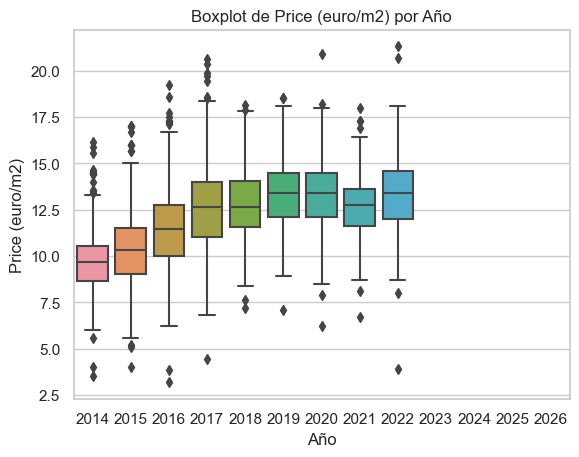

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14311 entries, 0 to 14310
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       14311 non-null  int64  
 1   Trimester                  14311 non-null  int64  
 2   District                   14311 non-null  object 
 3   Neighbourhood              14311 non-null  object 
 4   Price (euro/month)         2311 non-null   float64
 5   Price (euro/m2)            2311 non-null   float64
 6   Predicted Price (euro/m2)  12000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 782.8+ KB
None
               Year     Trimester  Price (euro/month)  Price (euro/m2)  \
count  14311.000000  14311.000000         2311.000000      2311.000000   
mean    2023.409266      2.490392          820.780658        12.134531   
std        2.864539      1.118001          255.450568         2.419414   
min     2014.000000    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


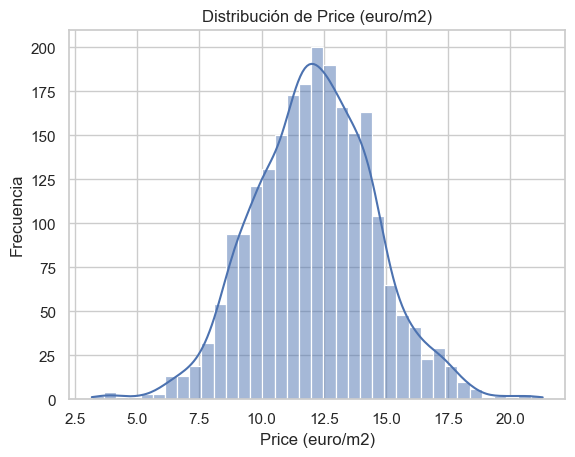

In [51]:

# Cargar el dataset actualizado
data_actualizado = pd.read_csv('./data_con_predicciones_2023_2026.csv')
print(data_actualizado)

sns.boxplot(x='Year', y='Price (euro/m2)', data=data_actualizado)
plt.title('Boxplot de Price (euro/m2) por Año')
plt.xlabel('Año')
plt.ylabel('Price (euro/m2)')
plt.show()


# Información general del dataset
print(data_actualizado.info())
print(data_actualizado.describe())
sns.histplot(data_actualizado['Price (euro/m2)'], kde=True)
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()


MODELO FINAL EVALUADO Y CONFIRMADO 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Cargar los datos de entrenamiento
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos de entrenamiento
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

data_clean = data[~data['Is_Outlier']]
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

X = data_encoded.drop('Price (euro/m2)', axis=1)
y = np.log1p(data_encoded['Price (euro/m2)'])  # Aplicar transformación logarítmica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluación del modelo Random Forest
y_pred_log = rf_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Deshacer la transformación logarítmica
y_test_exp = np.expm1(y_test)

mae = mean_absolute_error(y_test_exp, y_pred)
mse = mean_squared_error(y_test_exp, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f'\nModel: RandomForest')
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')
print(f'Cross-Validation R²: {cv_scores.mean()}, {cv_scores.std()}')

# Cargar los nuevos datos
new_data = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})

# Preprocesamiento de los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el modelo Random Forest
predictions_log = rf_model.predict(new_data_scaled)
predictions = np.expm1(predictions_log)  # Deshacer la transformación logarítmica
new_data['Predicted Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)']])

# Guardar las predicciones en un archivo CSV
new_data.to_csv('new_data_with_predictions.csv', index=False)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Model: RandomForest
MAE: 0.42201889530436143, MSE: 0.4253080273572114, RMSE: 0.6521564439283042, R²: 0.9185249447007691
Cross-Validation R²: 0.9109183548848169, 0.017015801009030777
   Year  Trimester      District        Neighbourhood  \
0  2024          1      Eixample  Dreta de l'Eixample   
1  2024          2    Sant Martí          El Poblenou   
2  2024          3        Gràcia       Vila de Gràcia   
3  2024          4  Ciutat Vella             El Raval   

   Predicted Price (euro/m2)  
0                   9.395742  
1                   9.452887  
2                   9.493308  
3                   9.538878  


In [ ]:
# con transformacion logaritmica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Cargar los datos de entrenamiento
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos de entrenamiento
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

data_clean = data[~data['Is_Outlier']]
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

X = data_encoded.drop('Price (euro/m2)', axis=1)
y = np.log1p(data_encoded['Price (euro/m2)'])  # Aplicar transformación logarítmica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluación del modelo Random Forest
y_pred_log = rf_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Deshacer la transformación logarítmica
y_test_exp = np.expm1(y_test)

mae = mean_absolute_error(y_test_exp, y_pred)
mse = mean_squared_error(y_test_exp, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f'\nModel: RandomForest')
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')
print(f'Cross-Validation R²: {cv_scores.mean()}, {cv_scores.std()}')

# Cargar los nuevos datos
new_data = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})

# Preprocesamiento de los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el modelo Random Forest
predictions_log = rf_model.predict(new_data_scaled)
predictions = np.expm1(predictions_log)  # Deshacer la transformación logarítmica
new_data['Predicted Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)']])

# Guardar las predicciones en un archivo CSV
new_data.to_csv('new_data_with_predictions.csv', index=False)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Model: RandomForest
MAE: 0.42201889530436143, MSE: 0.4253080273572114, RMSE: 0.6521564439283042, R²: 0.9185249447007691
Cross-Validation R²: 0.9109183548848169, 0.017015801009030777
   Year  Trimester      District        Neighbourhood  \
0  2024          1      Eixample  Dreta de l'Eixample   
1  2024          2    Sant Martí          El Poblenou   
2  2024          3        Gràcia       Vila de Gràcia   
3  2024          4  Ciutat Vella             El Raval   

   Predicted Price (euro/m2)  
0                   9.395742  
1                   9.452887  
2                   9.493308  
3                   9.538878  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy import stats

# Cargar los datos
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos de entrenamiento
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

data_clean = data[~data['Is_Outlier']]
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

X = data_encoded.drop('Price (euro/m2)', axis=1)
y = np.log1p(data_encoded['Price (euro/m2)'])  # Aplicar transformación logarítmica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar el modelo Ridge
ridge_model = Ridge()

# Entrenar el modelo
ridge_model.fit(X_train_scaled, y_train)

# Evaluación del modelo
y_pred_log = ridge_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Deshacer la transformación logarítmica
y_test_exp = np.expm1(y_test)

mae = mean_absolute_error(y_test_exp, y_pred)
mse = mean_squared_error(y_test_exp, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred)
cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')

print('\nModel: Ridge')
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')
print(f'Cross-Validation R²: {cv_scores.mean()}, {cv_scores.std()}')

# Cargar los nuevos datos
new_data = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})

# Preprocesamiento de los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el modelo Ridge
predictions_log = ridge_model.predict(new_data_scaled)
predictions = np.expm1(predictions_log)  # Deshacer la transformación logarítmica
new_data['Predicted Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)']])

# Guardar las predicciones en un archivo CSV
# new_data.to_csv('new_data_with_predictions.csv', index=False)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Model: Ridge
MAE: 0.5589178974274367, MSE: 0.5916422702508758, RMSE: 0.7691828587864369, R²: 0.8866607644685565
Cross-Validation R²: 0.8906596215070047, 0.01104634088766785
   Year  Trimester      District        Neighbourhood  \
0  2024          1      Eixample  Dreta de l'Eixample   
1  2024          2    Sant Martí          El Poblenou   
2  2024          3        Gràcia       Vila de Gràcia   
3  2024          4  Ciutat Vella             El Raval   

   Predicted Price (euro/m2)  
0                   7.715120  
1                   7.894719  
2                   7.940460  
3                   9.101016  


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Paso 1: Cargar los datos
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# Análisis Exploratorio de Datos (EDA)
print(data.info())
print(data.describe())

# Crear una nueva característica


# Visualizar la nueva característica
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Price_Ratio'], bins=30, edgecolor='k')
plt.title('Distribución de Price Ratio')
plt.xlabel('Price Ratio')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(data['Year'], bins=30, edgecolor='k')
plt.title('Distribución de Year')
plt.xlabel('Year')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Paso 2: Identificar y corregir outliers utilizando K-means clustering
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Calcular SSE para diferentes valores de k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

# Graficar SSE vs. k para encontrar el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.title("Método del Codo para encontrar el número óptimo de clústeres")
plt.show()

# Aplicar K-means clustering con 4 clústeres (según el gráfico del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)
threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

# Eliminar outliers
data_clean = data[~data['Is_Outlier']]

# Visualizar los outliers eliminados
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Price (euro/m2)', hue='Is_Outlier', palette={True: 'red', False: 'blue'})
plt.title('Outliers de Price (euro/m2) por Año usando K-means Clustering')
plt.show()

# Paso 3: Aplicar transformación logarítmica
data_clean['log_Price (euro/m2)'] = np.log1p(data_clean['Price (euro/m2)'])

# Visualizar la distribución después de la transformación
sns.histplot(data_clean['log_Price (euro/m2)'], kde=True)
plt.title('Distribución de log_Price (euro/m2)')
plt.show()

# Paso 4: Descomponer la serie temporal
data_clean['Date'] = pd.to_datetime(data_clean['Year'].astype(str) + 'Q' + data_clean['Trimester'].astype(str).str.zfill(1))
data_clean.set_index('Date', inplace=True)

decomposition = sm.tsa.seasonal_decompose(data_clean['Price (euro/m2)'], model='additive', period=4)
fig = decomposition.plot()
plt.show()

# Paso 5: Modelo ARIMA
model_arima = ARIMA(data_clean['Price (euro/m2)'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

forecast_arima = model_arima_fit.forecast(steps=len(y_test))
forecast_arima_indexed = pd.Series(forecast_arima, index=y_test.index)
plt.plot(data_clean['Price (euro/m2)'], label='Original')
plt.plot(forecast_arima_indexed, label='Forecast')
plt.legend()
plt.show()

# Paso 6: Modelo de Regresión
data_clean['Price_Ratio'] = data_clean['Price (euro/month)'] / data_clean['Price (euro/m2)']
X = data_clean[['Price (euro/month)', 'Price_Ratio']]
y = data_clean['Price (euro/m2)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R²:', r2_score(y_test, y_pred_lr))

# Paso 7: Combinación de predicciones
combined_forecast = (forecast_arima_indexed.values + y_pred_lr) / 2
combined_forecast = pd.Series(combined_forecast, index=y_test.index)

print('Combined MAE:', mean_absolute_error(y_test, combined_forecast))
print('Combined MSE:', mean_squared_error(y_test, combined_forecast))
print('Combined RMSE:', np.sqrt(mean_squared_error(y_test, combined_forecast)))
print('Combined R²:', r2_score(y_test, combined_forecast))

# Paso 8: Predicción con nuevos datos
new_data = pd.DataFrame({
    'Year': [2040, 2040, 2040, 2040],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})

avg_price_month = data['Price (euro/month)'].mean()
avg_price_m2 = data['Price (euro/m2)'].mean()
new_data['Price (euro/m2)'] = avg_price_m2
new_data['Price (euro/month)'] = avg_price_month
new_data['Price_Ratio'] = new_data['Price (euro/month)'] / new_data['Price (euro/m2)']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_new_features = poly.fit_transform(new_data[['Year', 'Trimester']])
poly_new_features_df = pd.DataFrame(poly_new_features, columns=poly.get_feature_names_out(['Year', 'Trimester']))

new_data = pd.concat([new_data.reset_index(drop=True), poly_new_features_df.reset_index(drop=True)], axis=1)

new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]

new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción
predictions_log = ridge_model.predict(new_data_scaled)
predictions = np.expm1(predictions_log)
new_data['Predicted Price (euro/m2)'] = predictions

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)']])


FileNotFoundError: [Errno 2] No such file or directory: './Barcelona_rent_price.csv'

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from prophet import Prophet

# Cargar los datos
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# Crear una nueva característica
data['Price_Ratio'] = data['Price (euro/month)'] / data['Price (euro/m2)']

# Identificar y corregir outliers utilizando K-means clustering
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Calcular SSE para diferentes valores de k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

# Aplicar K-means clustering con 4 clústeres (según el gráfico del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)
threshold = data['Distance_to_Centroid'].quantile(0.95)
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold

# Eliminar outliers
data_clean = data[~data['Is_Outlier']]

# Binarización de variables categóricas
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

# División en características (X) y variable objetivo (y)
X = data_encoded.drop('Price (euro/m2)', axis=1)
y = data_encoded['Price (euro/m2)']

# Escalado de los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')

# Validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f'Validación cruzada R²: {scores.mean()}, {scores.std()}')

# Preparar los datos para Prophet
prophet_data = data_clean[['Year', 'Trimester', 'Price (euro/m2)']]
prophet_data['ds'] = pd.to_datetime(prophet_data['Year'].astype(str) + 'Q' + prophet_data['Trimester'].astype(str).str[0])
prophet_data.rename(columns={'Price (euro/m2)': 'y'}, inplace=True)

# Ajustar el modelo Prophet
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_prophet.fit(prophet_data[['ds', 'y']])

# Hacer una predicción futura
future = model_prophet.make_future_dataframe(periods=16, freq='Q')
forecast = model_prophet.predict(future)

# Plot de la predicción
fig = model_prophet.plot(forecast)
plt.show()

# Extraer la predicción del futuro
forecast_filtered = forecast[['ds', 'yhat']].tail(16)

# Convertir las predicciones de Prophet a formato de DataFrame
forecast_filtered.rename(columns={'yhat': 'Prophet_Prediction'}, inplace=True)

# Unir las predicciones de Prophet con los nuevos datos
new_data = pd.DataFrame({
    'Year': [2040, 2040, 2040, 2040],
    'Trimester': [1, 2, 3, 4],
    'District': ['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella'],
    'Neighbourhood': ['Dreta de l\'Eixample', 'El Poblenou', 'Vila de Gràcia', 'El Raval']
})

new_data['ds'] = pd.to_datetime(new_data['Year'].astype(str) + 'Q' + new_data['Trimester'].astype(str).str[0])
new_data = new_data.merge(forecast_filtered, on='ds', how='left')

# Preprocesamiento de los nuevos datos para regresión lineal
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0

new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Escalado de los nuevos datos
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el modelo de regresión lineal
regression_predictions = linear_model.predict(new_data_scaled)

# Combinar las predicciones de Prophet y la regresión lineal
new_data['Reg_Prediction'] = regression_predictions
new_data['Combined_Prediction'] = (new_data['Prophet_Prediction'] + new_data['Reg_Prediction']) / 2

# Mostrar las predicciones combinadas
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Combined_Prediction']])


FileNotFoundError: [Errno 2] No such file or directory: './Barcelona_rent_price.csv'

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Cargar el dataset original
data_original = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')

# Preprocesamiento de los datos originales
numeric_data = data_original.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Codificación de variables categóricas
data_encoded = pd.get_dummies(data_original, columns=['District', 'Neighbourhood'])

X = data_encoded.drop(['Price (euro/m2)', 'Price (euro/month)'], axis=1)
y_m2 = np.log1p(data_encoded['Price (euro/m2)'])
y_month = np.log1p(data_encoded['Price (euro/month)'])

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y_m2, test_size=0.2, random_state=42)
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X, y_month, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled_m2 = scaler.fit_transform(X_train_m2)
X_test_scaled_m2 = scaler.transform(X_test_m2)
X_train_scaled_month = scaler.fit_transform(X_train_month)
X_test_scaled_month = scaler.transform(X_test_month)

# Entrenar modelos
ridge_model_m2 = Ridge(alpha=1.0)
ridge_model_m2.fit(X_train_scaled_m2, y_train_m2)
ridge_model_month = Ridge(alpha=1.0)
ridge_model_month.fit(X_train_scaled_month, y_train_month)

# Crear dataframe para predicciones 2023-2026
years = [2023, 2024, 2025, 2026]
trimesters = [1, 2, 3, 4]
districts = data_original['District'].unique()
neighbourhoods = data_original['Neighbourhood'].unique()

new_data = pd.DataFrame([(year, trimester, district, neighbourhood)
                         for year in years
                         for trimester in trimesters
                         for district in districts
                         for neighbourhood in neighbourhoods],
                        columns=['Year', 'Trimester', 'District', 'Neighbourhood'])

# Codificación de variables categóricas en los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])

# Asegurarnos de que todas las columnas de características estén presentes
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X.columns]

new_data_scaled = scaler.transform(new_data_encoded)

# Realizar predicciones
predictions_log_m2 = ridge_model_m2.predict(new_data_scaled)
predictions_m2 = np.expm1(predictions_log_m2)
new_data['Price (euro/m2)'] = predictions_m2

predictions_log_month = ridge_model_month.predict(new_data_scaled)
predictions_month = np.expm1(predictions_log_month)
new_data['Price (euro/month)'] = predictions_month

# Guardar las predicciones en un archivo CSV
new_data.to_csv('new_data_with_predictions_2023_2026_corrected.csv', index=False)


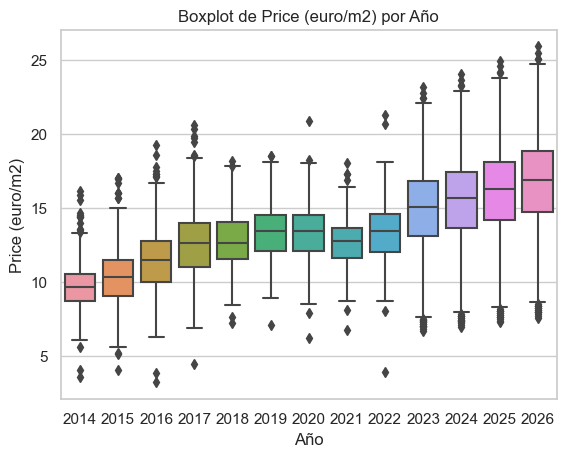

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


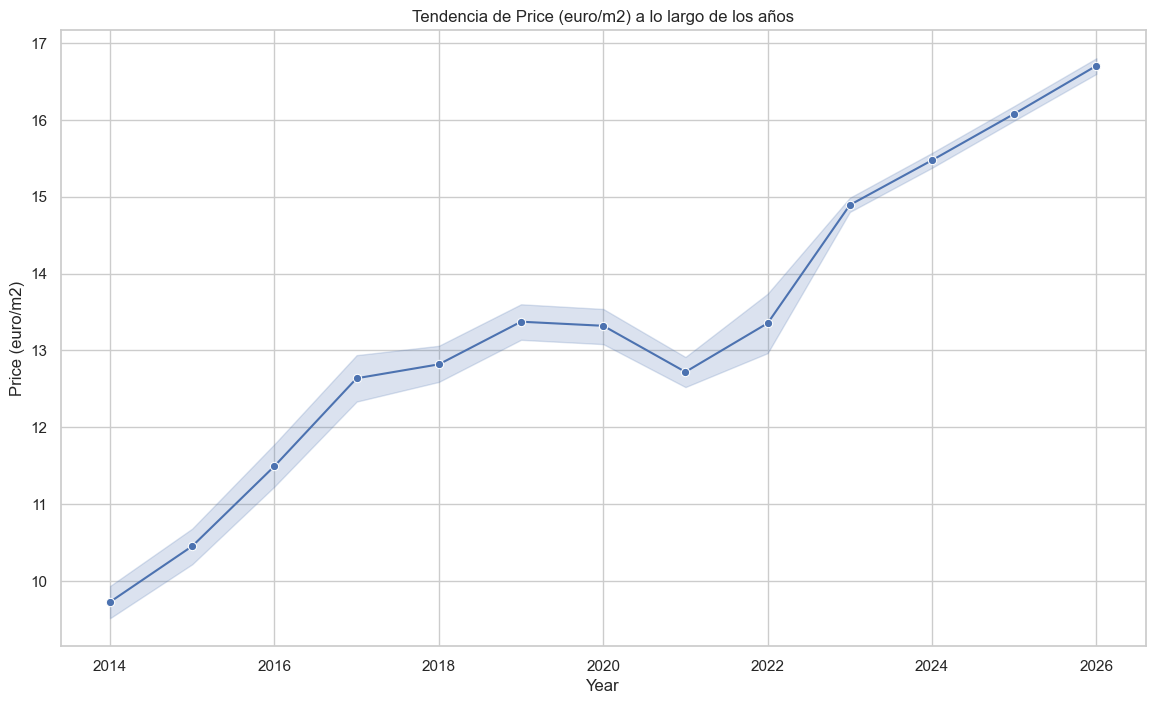

El dataset actualizado ha sido guardado como data_con_predicciones_2023_2026_final.csv


In [57]:
import pandas as pd

# Cargar el archivo original de Barcelona y el archivo con predicciones
data_original = pd.read_csv("../Barcelona_rent_price.csv", delimiter=';')
predicciones_2023_2026 = pd.read_csv('new_data_with_predictions_2023_2026_corrected.csv')

# Unir los datasets
data_actualizado = pd.concat([data_original, predicciones_2023_2026], ignore_index=True)

# Guardar el dataset actualizado en un archivo CSV
data_actualizado.to_csv('data_con_predicciones_2023_2026_final.csv', index=False)
sns.boxplot(x='Year', y='Price (euro/m2)', data=data_actualizado)
plt.title('Boxplot de Price (euro/m2) por Año')
plt.xlabel('Año')
plt.ylabel('Price (euro/m2)')
plt.show()
# Tendencia de Price (euro/m2) a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Price (euro/m2)', data=data_actualizado, marker='o')
plt.title('Tendencia de Price (euro/m2) a lo largo de los años')
plt.xlabel('Year')
plt.ylabel('Price (euro/m2)')
plt.grid(True)
plt.show()
print('El dataset actualizado ha sido guardado como data_con_predicciones_2023_2026_final.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14311 entries, 0 to 14310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                14311 non-null  int64  
 1   Trimester           14311 non-null  int64  
 2   District            14311 non-null  object 
 3   Neighbourhood       14311 non-null  object 
 4   Price (euro/month)  14311 non-null  float64
 5   Price (euro/m2)     14311 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 671.0+ KB
None
               Year     Trimester  Price (euro/month)  Price (euro/m2)
count  14311.000000  14311.000000        14311.000000     14311.000000
mean    2023.409266      2.490392         1076.132712        15.198982
std        2.864539      1.118001          320.384326         3.069668
min     2014.000000      1.000000          142.340000         3.180000
25%     2023.000000      1.000000          842.534248        13.077383
50%  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


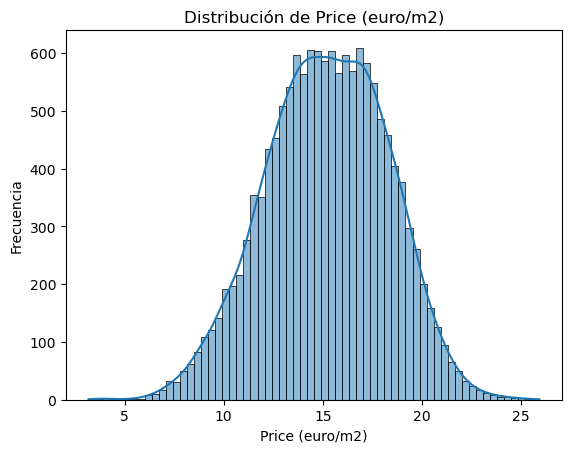

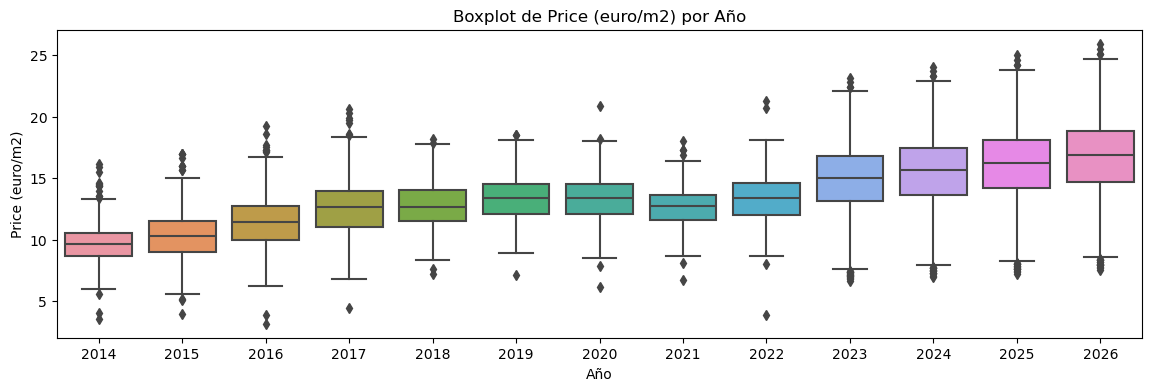

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


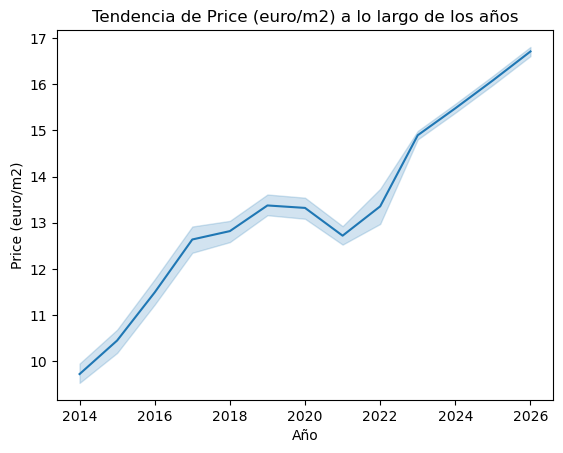

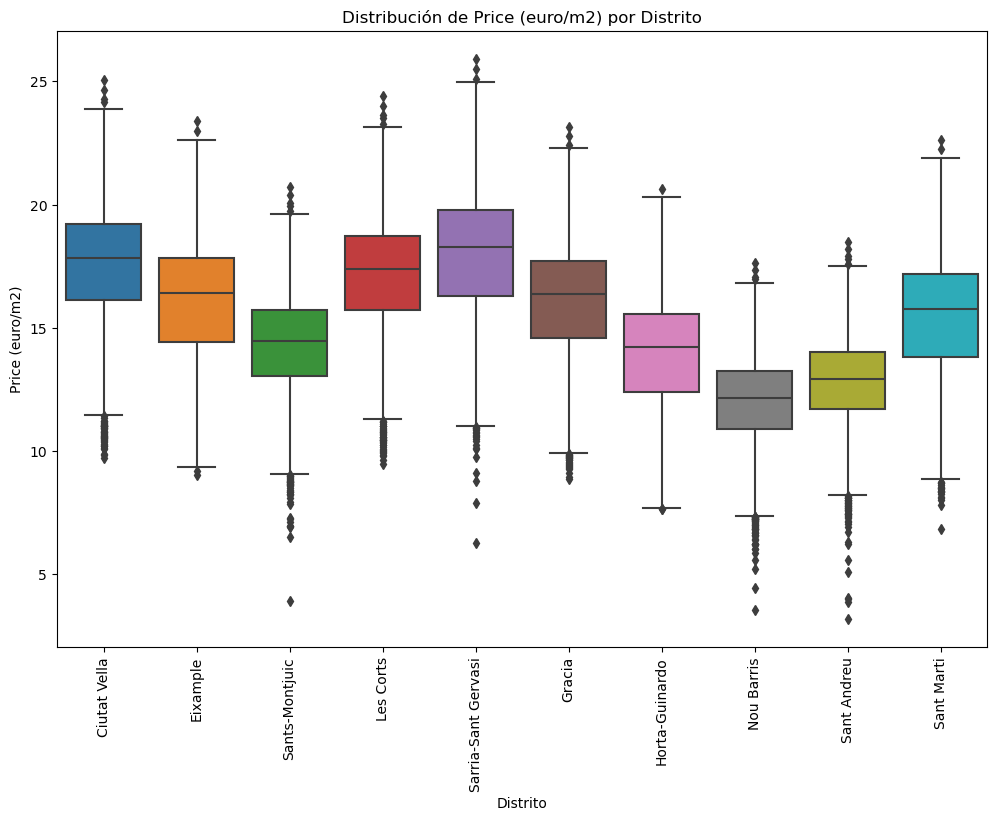

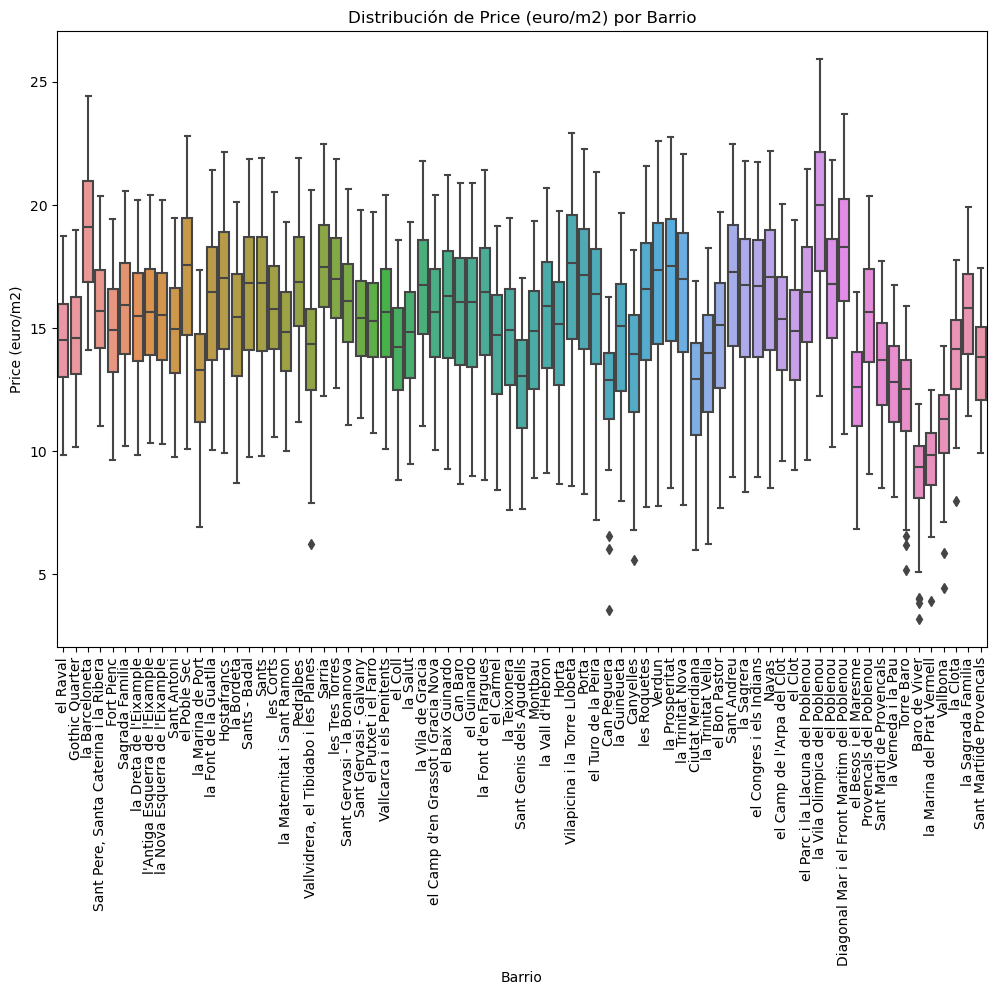

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset actualizado
data_actualizado = pd.read_csv('./data_con_predicciones_2023_2026_final.csv')

# Información general del dataset
print(data_actualizado.info())
print(data_actualizado.describe())

# Visualizaciones

# Distribución de Price (euro/m2)
sns.histplot(data_actualizado['Price (euro/m2)'], kde=True)
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de Price (euro/m2) por Año
plt.figure(figsize=(14, 4))
sns.boxplot(x='Year', y='Price (euro/m2)', data=data_actualizado)
plt.title('Boxplot de Price (euro/m2) por Año')
plt.xlabel('Año')
plt.ylabel('Price (euro/m2)')
plt.show()

# Tendencia de Price (euro/m2) a lo largo de los años
sns.lineplot(x='Year', y='Price (euro/m2)', data=data_actualizado)
plt.title('Tendencia de Price (euro/m2) a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Price (euro/m2)')
plt.show()

# Distribución de Precios por Distrito
plt.figure(figsize=(12, 8))
sns.boxplot(x='District', y='Price (euro/m2)', data=data_actualizado)
plt.title('Distribución de Price (euro/m2) por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=90)
plt.show()

# Distribución de Precios por Barrio
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighbourhood', y='Price (euro/m2)', data=data_actualizado)
plt.title('Distribución de Price (euro/m2) por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=90)
plt.show()
